In [1]:
import tensorflow as tf
import numpy as np

from rcnn.simple_nn import build_rpn, build_shared
from rcnn.video_parser import get_data
from rcnn.data_generators import get_anchor, video_streamer

import pickle

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
data,_,_ = get_data('./videos/', './annotations/')

Parsing annotation files


In [3]:
with open('config.pickle', 'rb') as f:
    C = pickle.load(f)

In [4]:
data_gen = video_streamer(data, 2, C, lambda x,y: [x,y], 'tf', 'test')

In [5]:
x = next(data_gen)

In [6]:
x[1][0].shape

(1, 20, 32, 32, 18)

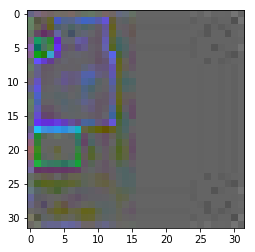

In [9]:
plt.imshow(x[0][0,19])
plt.show()

In [10]:
num_anchors = len(C.anchor_box_ratios) * len(C.anchor_box_scales)

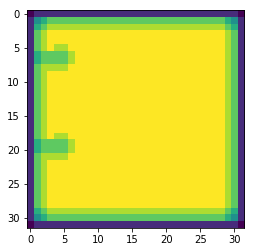

In [11]:
plt.imshow((x[1][0][0,19][...,:num_anchors]).sum(axis=-1))
plt.show()

In [12]:
x[1][1].shape

(1, 20, 32, 32, 72)

In [13]:
sess = tf.Session()

In [14]:
video_input = tf.placeholder(tf.float32, [None, None, None, None, 3])

In [15]:
base = build_shared(video_input)
rpn = build_rpn(base, num_anchors)

In [16]:
saver = tf.train.Saver()

In [17]:
def predict_rpn(X):
    return sess.run(rpn, {video_input:X})

In [18]:
stochestic backpropagation through mixture distributions

SyntaxError: invalid syntax (<ipython-input-18-fbe7343764b5>, line 1)

In [76]:
saver.restore(sess, './save_dir/rpn_only.sv')

INFO:tensorflow:Restoring parameters from ./save_dir/rpn_only.sv


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [1,1,24,36] rhs shape= [1,1,24,12]
	 [[Node: save/Assign_5 = Assign[T=DT_FLOAT, _class=["loc:@RPN/rpn_out_regress/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](RPN/rpn_out_regress/kernel, save/RestoreV2_5)]]

Caused by op 'save/Assign_5', defined at:
  File "/usr/lib64/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib64/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-416a2593f909>", line 1, in <module>
    saver = tf.train.Saver()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1140, in __init__
    self.build()
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1172, in build
    filename=self._filename)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 688, in build
    restore_sequentially, reshape)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 419, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 155, in restore
    self.op.get_shape().is_fully_defined())
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 274, in assign
    validate_shape=validate_shape)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 43, in assign
    use_locking=use_locking, name=name)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/nikita/.virtualenvs/py3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [1,1,24,36] rhs shape= [1,1,24,12]
	 [[Node: save/Assign_5 = Assign[T=DT_FLOAT, _class=["loc:@RPN/rpn_out_regress/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/cpu:0"](RPN/rpn_out_regress/kernel, save/RestoreV2_5)]]


In [72]:
preds = predict_rpn(x[0])[0]

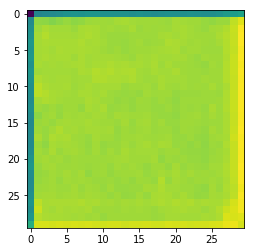

In [73]:
plt.imshow(preds[0,19][:-2,:-2].max(axis=-1))#, vmin=0, vmax=1)
plt.show()

In [59]:
preds[0,19].max(), preds[0,19].min(), preds[0,19].mean()

(0.66436136, 0.38805971, 0.49554172)

In [30]:
x[1][0][...,num_anchors:].mean()

0.00021701389

In [17]:
preds.shape

(4, 8, 32, 32, 9)

In [286]:
class_mapping = C.class_mapping

In [280]:
P_rpn = predict_rpn(x[0])

In [281]:
P_rpn = list(map(lambda x: x[0,0][np.newaxis,...], P_rpn))
img_data = x[-1][0][0]

In [282]:
img_data

{'bboxes': [{'class': 'bbox', 'x1': 22, 'x2': 24, 'y1': 0, 'y2': 2},
  {'class': 'bbox', 'x1': 6, 'x2': 8, 'y1': 29, 'y2': 31}],
 'filepath': './videos/8/37.jpg',
 'height': 32,
 'width': 32}

In [283]:
from rcnn import roi_helpers

In [287]:
R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, 'tf', use_regr=True, overlap_thresh=0.7, max_boxes=300)
X2, Y1, Y2, IouS = roi_helpers.calc_iou(R, img_data, C, class_mapping)

In [272]:
P_rpn[0].shape

(0, 32, 32, 9)

In [289]:
X2.shape

(1, 28, 4)

In [290]:
Y1.shape

(1, 28, 2)

In [291]:
Y2.shape

(1, 28, 8)

In [300]:
Y2

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.    